# Importing All the Libraries

In [302]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mae
from sklearn.linear_model import LinearRegression

# Load dataset

In [303]:
df=pd.read_csv('C:\\Users\\abc\\OneDrive\\Documents\\MyMachineLearningProjects\\StockPricePrediction\\StockPred.csv',  index_col=[0])
df.head()

,symbol,date,date_val,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,27/05/2015,5200,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1
1,AAPL,28/05/2015,5201,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1
2,AAPL,29/05/2015,5202,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1
3,AAPL,01/06/2015,5203,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1
4,AAPL,02/06/2015,5204,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1


# Plot the graph between closing price and date

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


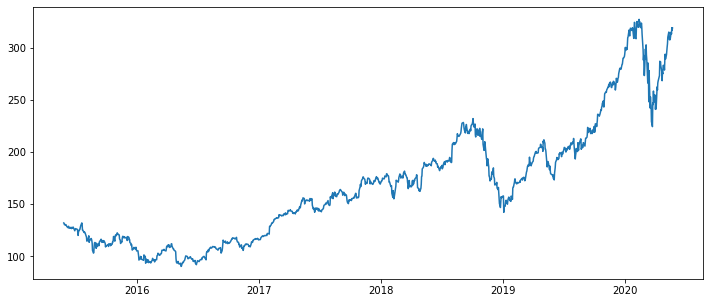

In [309]:
df.date=pd.to_datetime(df.date,format="%d/%m/%Y")#set the date according to required format
df.index=df.date           #set date as index value
dfcopy=df[['close','date']] #take only two columns from original dataset
dfcopy.drop('date', axis=1, inplace=True)
dfcopy.head()
plt.figure(figsize=(12,5))
plt.plot(df.close, label='Stock Closing Price')

# Split the data as train and test data

In [310]:
#splitting the time series data
trainSize=int(len(dfcopy)*0.7)    
testSize=len(dfcopy)-trainSize
XtrainD=dfcopy.iloc[0:trainSize,:]
XtestD=dfcopy.iloc[trainSize:len(dfcopy),:]

# Perform Preprocessing on dataset 

In [311]:
#preprocessing on data
scale=MinMaxScaler(feature_range=(0,1))
XtrainS=scale.fit_transform(XtrainD)
XtestS=scale.transform(XtestD)

In [312]:
#getting Xtrain, ytrain, Xtest, and ytest data through function
def dataset(timesteps, data):
    Xdata, ydata=[],[]
    for i in range(len(data)-timesteps-1):
        Xdata.append(data[i:(timesteps+i),0])
        ydata.append(data[(timesteps+i),0])
    return np.array(Xdata), np.array(ydata)

##getting Xtrain, ytrain, Xtest, and ytest data through function
Xtrain, ytrain = dataset(100, XtrainS)
Xtest, ytest = dataset(100, XtestS)

# Random Forest as Classifier

<ipython-input-318-a018df887c21>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testD['pred']=Yprediction


Text(0.5, 1.0, 'Stock Close Value Prediction using Random Forest')

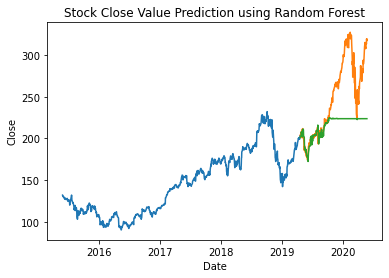

In [318]:
#applying the classifier
model=RandomForestRegressor(n_estimators=100)
model.fit(Xtrain, ytrain)

#predicting the output and transforming values
ypred=model.predict(Xtest)
Yprediction=scale.inverse_transform(ypred.reshape(-1,1))

#plotting the prediction, training and original data
trainD , testD = dfcopy[:981] , dfcopy[981:]
testD['pred']=Yprediction
plt.plot(trainD.close)
plt.plot(testD[['close','pred']])
plt.xlabel('Date') 
plt.ylabel('Close') 
plt.title('Stock Close Value Prediction using Random Forest')

# Calculating mean square error of Random Forest

In [319]:
math.sqrt(mae(ypred,ytest))

0.33352522044354

# Linear Regression as Classifier

<ipython-input-316-55940125b8b8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testD['pred']=Yprediction


Text(0.5, 1.0, 'Stock Close Value Prediction using Random Forest')

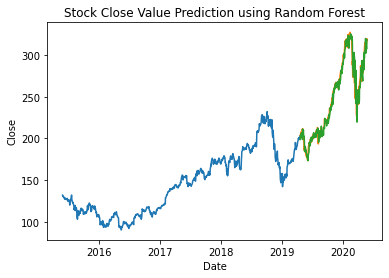

In [316]:
#applying the classifier
model=LinearRegression()
model.fit(Xtrain, ytrain)

#predicting the output and transforming values
ypred=model.predict(Xtest)
Yprediction=scale.inverse_transform(ypred.reshape(-1,1))

#plotting the prediction, training and original data
trainD , testD = dfcopy[:981] , dfcopy[981:]
testD['pred']=Yprediction
plt.plot(trainD.close)
plt.plot(testD[['close','pred']])
plt.xlabel('Date') 
plt.ylabel('Close') 
plt.title('Stock Close Value Prediction using Random Forest')

# Calculating mean square error for Linear Regressor

In [317]:
math.sqrt(mae(ypred,ytest))

0.04559531274169451